# To predict loan status from using different Features.
# wheather a loan will be approved or not . 

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Dataset

In [2]:
data=pd.read_csv("C:\\Users\\asus\\Downloads\\loan_approved.csv")

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Domain Analysis


1) Loan_ID: A unique alphanumeric identifier assigned to each loan application.It's used for tracking and                        referencing records. 
2) Gender:  Applicant's gender.

3) Married: Indicates whether the applicant is married. Married applicants may have more stable financial                       situations or shared income.

4) Dependents:The number of individuals financially supported by the applicant. More dependents can reduce                        discretionary income, affecting repayment ability.

5) Education: Educational background (Graduate or Not Graduate). Education level often correlates with job                       stability and earning potential.

6) Self_Employed: Specifies whether the applicant is self-employed. This affects income variability and risk                           analysis, as self-employed income may be irregular.

7) ApplicantIncome: The primary applicant’s monthly income. It's a fundamental factor in determining loan                              eligibility and repayment capacity.

8) CoapplicantIncome: Income of any co-applicant (such as a spouse). Adds strength to the financial profile by                          increasing total income.

9) LoanAmount: The amount of money requested as a loan. Higher amounts increase the repayment burden and require                    stronger financial backing.

10) Loan_Amount_Term: Number of months over which the loan is to be repaid. Longer terms can reduce monthly                              payments but may increase total interest.

11) Credit_History: A numerical or binary indicator representing the applicant’s previous repayment record.                            Critical for assessing risk—generally.

12) Property_Area: The locality type (Urban, Semiurban, Rural) of the property for which the loan is requested.                        Influences risk modeling due to regional default trends.

13) Loan_Status (Approved): The outcome of the loan application


# Exploratory Data Analysis

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


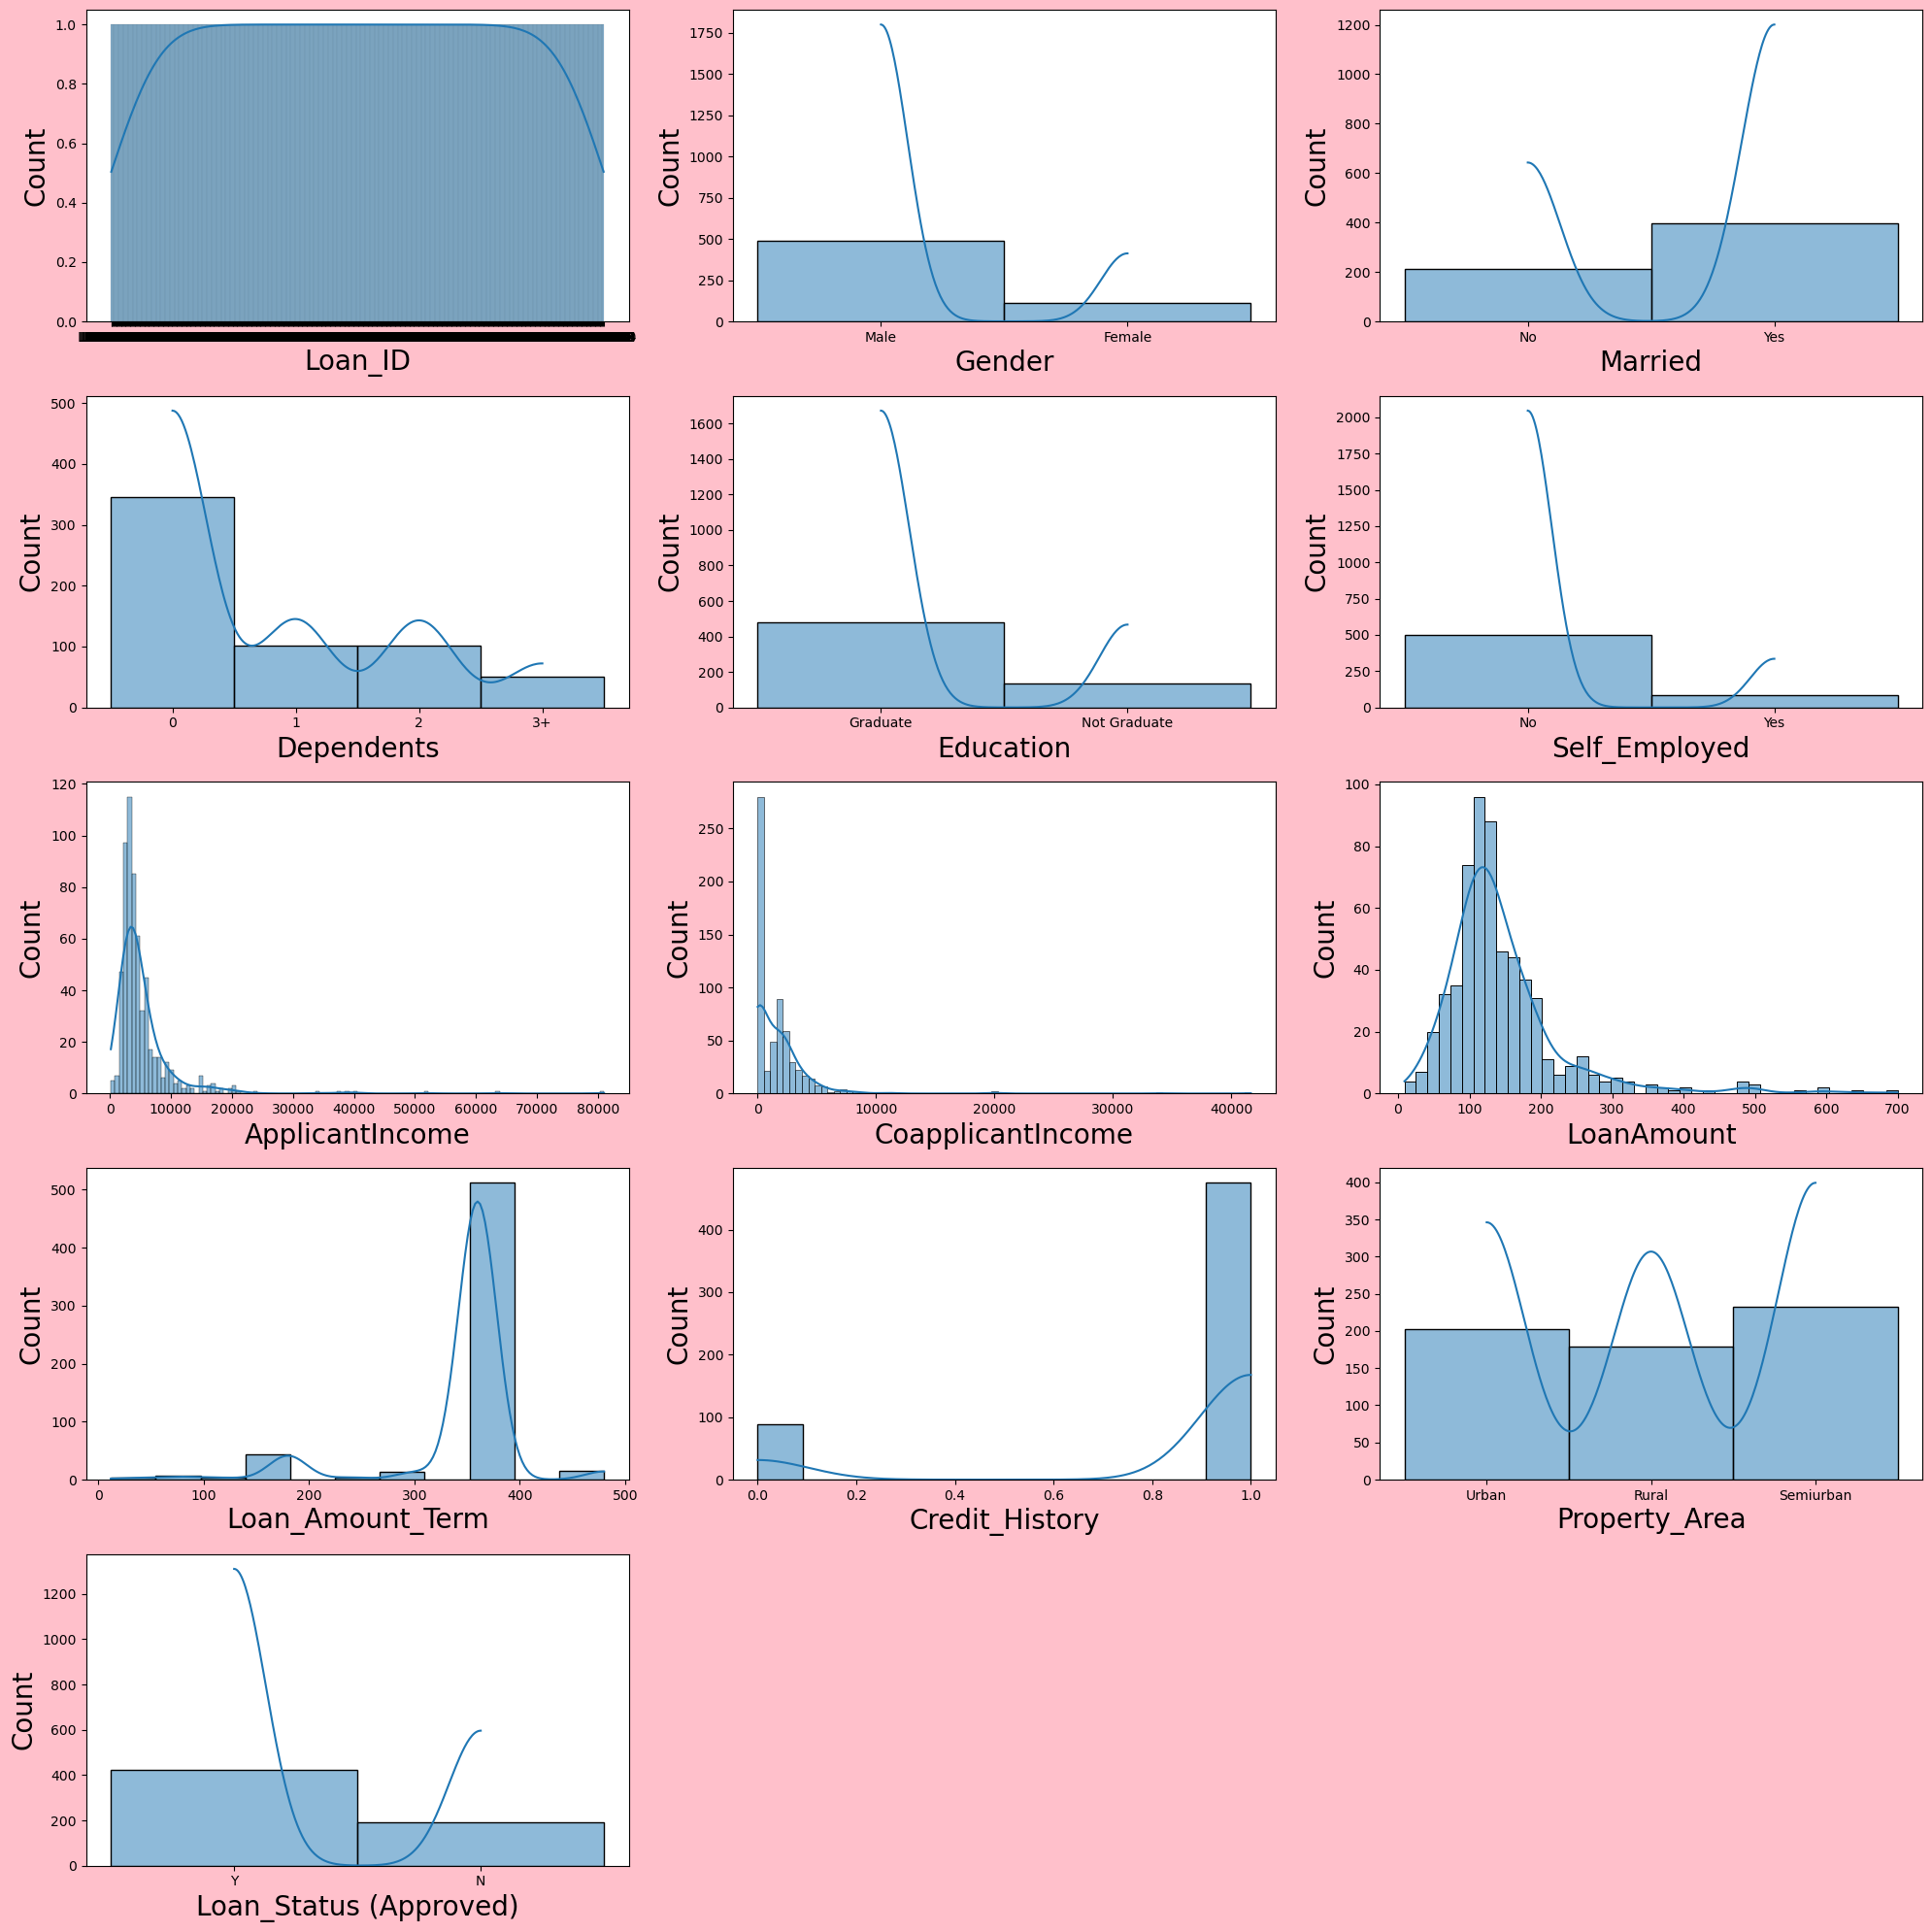

In [9]:
plt.figure(figsize=(20,20),facecolor='pink')
plotnumber=1

for column in data:
    if plotnumber<=13:
        ax=plt.subplot(5,3,plotnumber)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

1) Data of males is more than Female.
2) Data of Married persons is  also more.
3) All applicant income is  less than 200000
4) here we can observed loan amount & loan amount term is skewed.

1) Here we can see that income of female applicant is more than 8000 high chances of loan approved.

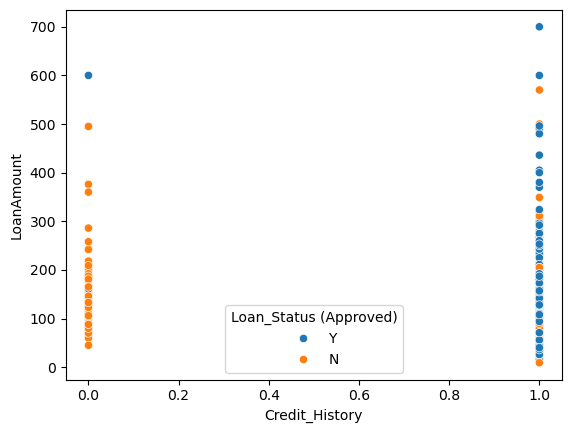

In [10]:
##Analyse the relationship between Credit_History and Loan_Status
sns.scatterplot(x='Credit_History',y='LoanAmount',hue='Loan_Status (Approved)', data=data)
plt.show()

1) Applicant credit score is 1 then loan will be approved in majority. 

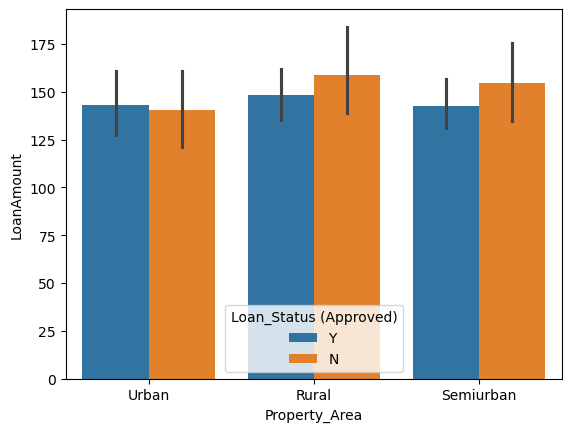

In [11]:
##Analyse the relationship between Property_Area  and Loan amount
sns.barplot(x='Property_Area',y='LoanAmount',hue='Loan_Status (Approved)', data=data)
plt.show()

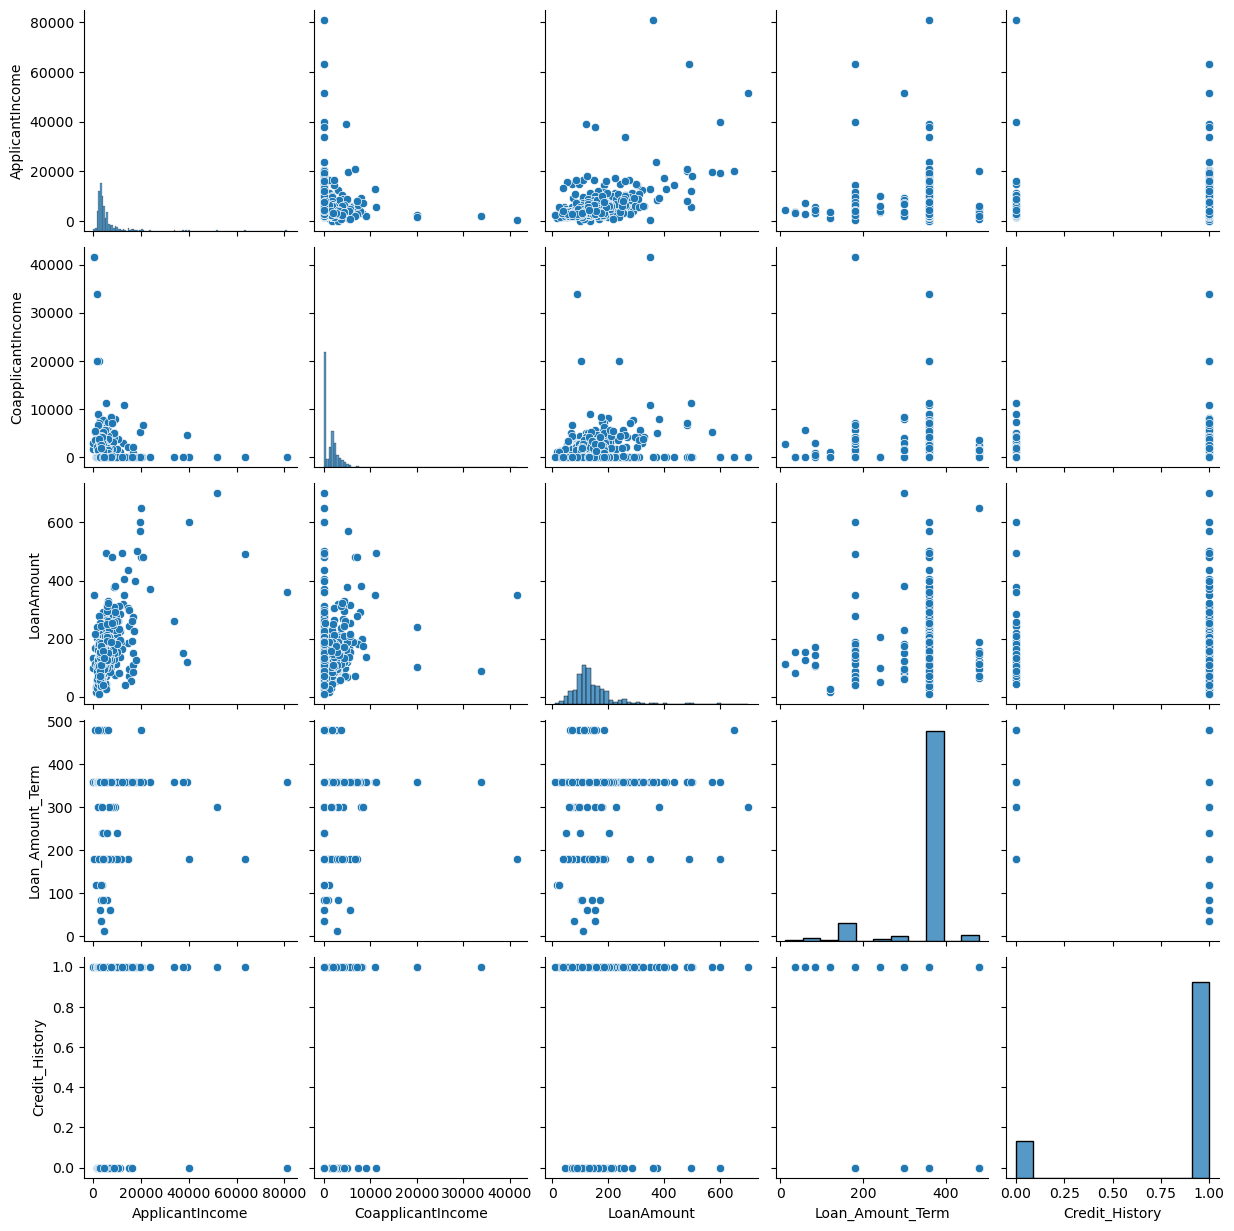

In [12]:
sns.pairplot(data)
plt.show()

In [13]:
# for Univariate Analysis
import sweetviz as sv
report= sv.analyze(data)
report.show_html()


                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [14]:
#for Bivariate Analysis
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
dfte = AV.AutoViz(data) 

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (614, 13)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  5
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Loan_ID,object,0.000000,100,,,Possible ID column: drop before modeling step.
Gender,object,2.117264,0,,,"13 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Married,object,0.488599,0,,,"3 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Dependents,object,2.442997,0,,,"15 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Education,object,0.000000,0,,,No issue
Self_Employed,object,5.211726,0,,,"32 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
ApplicantIncome,int64,0.000000,82,150.000000,81000.000000,Column has 50 outliers greater than upper bound (10171.25) or lower than lower bound(-1498.75). Cap them or remove them.
CoapplicantIncome,float64,0.000000,NA,0.000000,41667.000000,Column has 18 outliers greater than upper bound (5743.12) or lower than lower bound(-3445.88). Cap them or remove them.
LoanAmount,float64,3.583062,NA,9.000000,700.000000,"22 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 39 outliers greater than upper bound (270.00) or lower than lower bound(-2.00). Cap them or remove them."
Loan_Amount_Term,float64,2.280130,NA,12.000000,480.000000,"14 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 88 outliers greater than upper bound (360.00) or lower than lower bound(360.00). Cap them or remove them."


Number of All Scatter Plots = 6
All Plots done
Time to run AutoViz = 4 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


# Data Preprocessing and Feature Engineering.

In [15]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [16]:
# Handling the missing values
data.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

1) Null values present in Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History columns in data.

In [17]:
# count of missing values in Gender
data['Gender'].isna().sum() #NaN values

13

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
#Replace missing value with its mode for categorical data.
# Fill missing values in 'Gender' column with its mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

In [20]:
# count of missing values 
data['Gender'].isna().sum() #NaN values
data['Self_Employed'].isna().sum() #NaN values


0

In [21]:
# count of missing values Dependents
data['Dependents'].isna().sum() #NaN values

0

In [22]:
# count of missing values loanamount
data['LoanAmount'].isna().sum() #NaN values

22

In [23]:
#Replace missing value with its median for Numerical data.
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].median(), inplace=True)

In [24]:
data['LoanAmount'].isna().sum() #NaN values

0

In [25]:
# handling corrupted data 
# zero values available in ApplicantIncome,LoanAmount,Loan_Amount_Term that not possible. Is called as corrupted data.
len(data.loc[data['LoanAmount']==0])

0

In [26]:
len(data.loc[data['LoanAmount']==0])

0

In [27]:
len(data.loc[data['Loan_Amount_Term']==0])

0

In [28]:
data.ApplicantIncome.replace(0,np.median(data.ApplicantIncome),inplace=True)
data.LoanAmount.replace(0,np.median(data.LoanAmount),inplace=True)
data.Loan_Amount_Term.replace(0,np.median(data.Loan_Amount_Term),inplace=True)

In [29]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [30]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=13:
        ax=plt.subplot(3,5,plotnumber)
        sns.boxplot(data[column],ax=ax)
        plt.xlabel(column,fontsize=15)
        plt.ylabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

In [31]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [32]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  614 non-null    object 
 2   Married                 614 non-null    object 
 3   Dependents              614 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           614 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              614 non-null    float64
 9   Loan_Amount_Term        614 non-null    float64
 10  Credit_History          614 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [33]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

In [34]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
d1=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area','Loan_Status (Approved)']
df=scaling.fit_transform(data.drop(d1,axis=1))

In [35]:
df

array([[0.07048856, 0.        , 0.17221418, 0.74358974, 1.        ],
       [0.05482993, 0.03619171, 0.17221418, 0.74358974, 1.        ],
       [0.03525046, 0.        , 0.08248915, 0.74358974, 1.        ],
       ...,
       [0.09798392, 0.00575995, 0.35311143, 0.74358974, 1.        ],
       [0.09193568, 0.        , 0.25759768, 0.74358974, 1.        ],
       [0.05482993, 0.        , 0.17945007, 0.74358974, 0.        ]])

In [36]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

In [37]:
df1=pd.DataFrame(df,columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'])

In [38]:
df1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.070489,0.000000,0.172214,0.743590,1.0
1,0.054830,0.036192,0.172214,0.743590,1.0
2,0.035250,0.000000,0.082489,0.743590,1.0
3,0.030093,0.056592,0.160637,0.743590,1.0
4,0.072356,0.000000,0.191027,0.743590,1.0
...,...,...,...,...,...
609,0.034014,0.000000,0.089725,0.743590,1.0
610,0.048930,0.000000,0.044863,0.358974,1.0
611,0.097984,0.005760,0.353111,0.743590,1.0
612,0.091936,0.000000,0.257598,0.743590,1.0


In [39]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.064978,0.038910,0.197905,0.706005,0.855049
std,0.075560,0.070229,0.121718,0.137668,0.352339
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033735,0.000000,0.132055,0.743590,1.000000
50%,0.045300,0.028524,0.172214,0.743590,1.000000
75%,0.069821,0.055134,0.225398,0.743590,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
condata=data[ ['Loan_ID','Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area','Loan_Status (Approved)']]

In [41]:
condata

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [42]:
d=pd.concat([df1,condata],axis=1)

In [43]:
d.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status (Approved)
0,0.070489,0.000000,0.172214,0.74359,1.0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,0.054830,0.036192,0.172214,0.74359,1.0,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,0.035250,0.000000,0.082489,0.74359,1.0,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,0.030093,0.056592,0.160637,0.74359,1.0,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,0.072356,0.000000,0.191027,0.74359,1.0,LP001008,Male,No,0,Graduate,No,Urban,Y


# Feature Selection

In [44]:
# Drop unwanted columns
#Step 1 Dropping the unwanted variables
l1=['Loan_ID','Property_Area']
d.drop(l1,axis=1,inplace=True)


In [45]:
## We will check correlation
sns.heatmap(df1.corr(),annot=True)

<Axes: >

# Model Creation

In [46]:
d

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Loan_Status (Approved)
0,0.070489,0.000000,0.172214,0.743590,1.0,Male,No,0,Graduate,No,Y
1,0.054830,0.036192,0.172214,0.743590,1.0,Male,Yes,1,Graduate,No,N
2,0.035250,0.000000,0.082489,0.743590,1.0,Male,Yes,0,Graduate,Yes,Y
3,0.030093,0.056592,0.160637,0.743590,1.0,Male,Yes,0,Not Graduate,No,Y
4,0.072356,0.000000,0.191027,0.743590,1.0,Male,No,0,Graduate,No,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,0.034014,0.000000,0.089725,0.743590,1.0,Female,No,0,Graduate,No,Y
610,0.048930,0.000000,0.044863,0.358974,1.0,Male,Yes,3+,Graduate,No,Y
611,0.097984,0.005760,0.353111,0.743590,1.0,Male,Yes,1,Graduate,No,Y
612,0.091936,0.000000,0.257598,0.743590,1.0,Male,Yes,2,Graduate,No,Y


In [47]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ApplicantIncome         614 non-null    float64
 1   CoapplicantIncome       614 non-null    float64
 2   LoanAmount              614 non-null    float64
 3   Loan_Amount_Term        614 non-null    float64
 4   Credit_History          614 non-null    float64
 5   Gender                  614 non-null    object 
 6   Married                 614 non-null    object 
 7   Dependents              614 non-null    object 
 8   Education               614 non-null    object 
 9   Self_Employed           614 non-null    object 
 10  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(5), object(6)
memory usage: 52.9+ KB


In [48]:
d.rename(columns={'Loan_Status (Approved)': 'Loan_Status'}, inplace=True)

In [49]:
# Incoding data
d.replace({'Gender':{'Male':1,'Female':0},'Married':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},'Loan_Status':{'Y':1,'N':0},'Dependents':{'3+':3}},inplace=True)

In [50]:
len(d.loc[d['Gender']==1])

502

In [51]:
# Creating independent and dependent variable.
x=d.iloc[:,:-1]
y=d.Loan_Status

In [52]:
# Creating training and testing data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [53]:
# check data is balance or not
sns.histplot(x='Loan_Status (Approved)',data=data,)

<Axes: xlabel='Loan_Status (Approved)', ylabel='Count'>

In [54]:
d.Loan_Status.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [55]:
# Data balancing
# Apply SMOTE to balance the data
from imblearn.over_sampling import SMOTE

smote = SMOTE() ## object creation

In [56]:
y_train.value_counts()

Loan_Status
1    322
0    138
Name: count, dtype: int64

In [57]:
x_train_smote, y_train_smote = smote.fit_resample(x_train,y_train)

In [58]:
y= np.array(y_train_smote)

In [59]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({1: 322, 0: 138})
SMOTE Classes Counter({1: 322, 0: 322})


In [60]:
y_train_smote

0      1
1      1
2      1
3      1
4      0
      ..
639    0
640    0
641    0
642    0
643    0
Name: Loan_Status, Length: 644, dtype: int64

In [61]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_smote, y_train_smote)

LogisticRegression()

In [62]:
## Step 4 Prediction
y_pred=lr.predict(x_test)

In [63]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1],
      dtype=int64)

In [64]:
y_test

350    1
377    1
163    1
609    1
132    1
578    1
316    1
2      1
340    0
77     0
218    0
462    1
109    1
322    1
137    1
363    1
208    1
101    1
234    1
182    1
437    1
361    1
228    1
296    1
509    1
196    1
485    1
209    0
355    1
610    1
10     1
145    1
301    1
577    1
148    0
412    0
457    0
602    1
55     1
82     0
110    1
543    1
319    0
549    1
131    1
204    1
30     0
569    0
452    0
548    0
449    0
210    0
300    0
519    0
70     1
153    0
76     0
212    1
584    0
580    1
155    1
24     0
550    0
439    1
394    1
382    1
29     1
478    1
257    0
192    0
421    0
277    1
174    0
140    0
78     0
81     1
505    1
63     0
396    0
72     1
469    0
575    1
574    0
568    0
104    1
327    1
570    1
589    0
6      1
284    0
135    0
431    0
250    0
368    1
558    1
176    1
473    1
86     1
181    0
158    1
281    1
275    1
595    1
188    1
260    1
450    0
425    1
73     0
39     1
415    1
238    1
6

# Evaluation of Model

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [66]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[23 31]
 [ 7 93]]


In [67]:
recall=recall_score(y_test,y_pred)
recall

0.93

In [68]:
precision=precision_score(y_test,y_pred)
precision

0.75

In [69]:
f1score=f1_score(y_test,y_pred)
f1score

0.8303571428571429

In [70]:
ascore=accuracy_score(y_test,y_pred)
ascore

0.7532467532467533

In [71]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.43      0.55        54
           1       0.75      0.93      0.83       100

    accuracy                           0.75       154
   macro avg       0.76      0.68      0.69       154
weighted avg       0.76      0.75      0.73       154



# ****** Model gives 75 % Accurarate Prediction ***********


# Naive Bayes Algorithms

In [72]:
d.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Loan_Status
0,0.070489,0.000000,0.172214,0.74359,1.0,1,0,0,1,0,1
1,0.054830,0.036192,0.172214,0.74359,1.0,1,1,1,1,0,0
2,0.035250,0.000000,0.082489,0.74359,1.0,1,1,0,1,1,1
3,0.030093,0.056592,0.160637,0.74359,1.0,1,1,0,0,0,1
4,0.072356,0.000000,0.191027,0.74359,1.0,1,0,0,1,0,1


In [73]:
x= d.iloc[:, :-1]
y=d.Loan_Status

In [74]:
#Train test splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [75]:
# model Creation
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()
nb.fit(x_train,y_train)

BernoulliNB()

In [76]:
y_pred= nb.predict(x_test)

In [77]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [78]:
# model Evaluation 
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[21 33]
 [ 2 98]]


In [79]:
print(f'accuracy_score:',accuracy_score(y_test,y_pred))
print(f'recall_score:',recall_score(y_test,y_pred))
print(f'precision_score:',precision_score(y_test,y_pred))
print(f'f1_score:',f1_score(y_test,y_pred))
print(f'classification_report:',classification_report(y_test,y_pred))

accuracy_score: 0.7727272727272727
recall_score: 0.98
precision_score: 0.7480916030534351
f1_score: 0.8484848484848485
classification_report:               precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



# ******Model give 77% **************